In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import urllib.request
import seaborn as sns


# Enunciado

Los enunciados del TP 3 son los siguientes:

1.   Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters. Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de *sprites* (matriz *data*).
2.   Visualizar las primeras dos componentes de la matriz de *sprites*, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).
3.   Visualizar los primeros 10 elementos de cada cluster.
4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?
5.   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?
6.   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros?

**Optativo**

7.   Entrenar, evaluar y determinar la performance de un modelo de aprendizaje supervisado para predecir alguna característica de los Pokémones en base a sus *sprites*. Puede ser, por ejemplo, un modelo de regresión (predecir *HP*, *Attack*, *Defense*, *Speed*), un modelo de clasificación binaria (legendario o no legendario), o un modelo de clasificación multiclase (tipo del Pokémon: tierra, hielo, agua, fuego, etc).

#Cargamos los datos

In [7]:
url = 'https://raw.githubusercontent.com/P11-P11/Data-Science/Unsupervised-Learning/Pokemones/pokemon_imagenes.p'
urllib.request.urlretrieve(url, 'pokemon_imagenes.p')
with open('pokemon_imagenes.p', 'rb') as archivo_p:
    data = pickle.load(archivo_p)


nombres= data['nombres']
imagenes = data['imagenes']

url_csv = 'https://raw.githubusercontent.com/P11-P11/Data-Science/Unsupervised-Learning/Pokemones/pokemon_dataframe.csv'
df = pd.read_csv(url_csv)


In [8]:
# Vectorizar las matrices
data = np.zeros((len(nombres),56*68))
for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img

#Aplicamos el test del codo para determinar el numero de clusters

Ejercicio 1

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

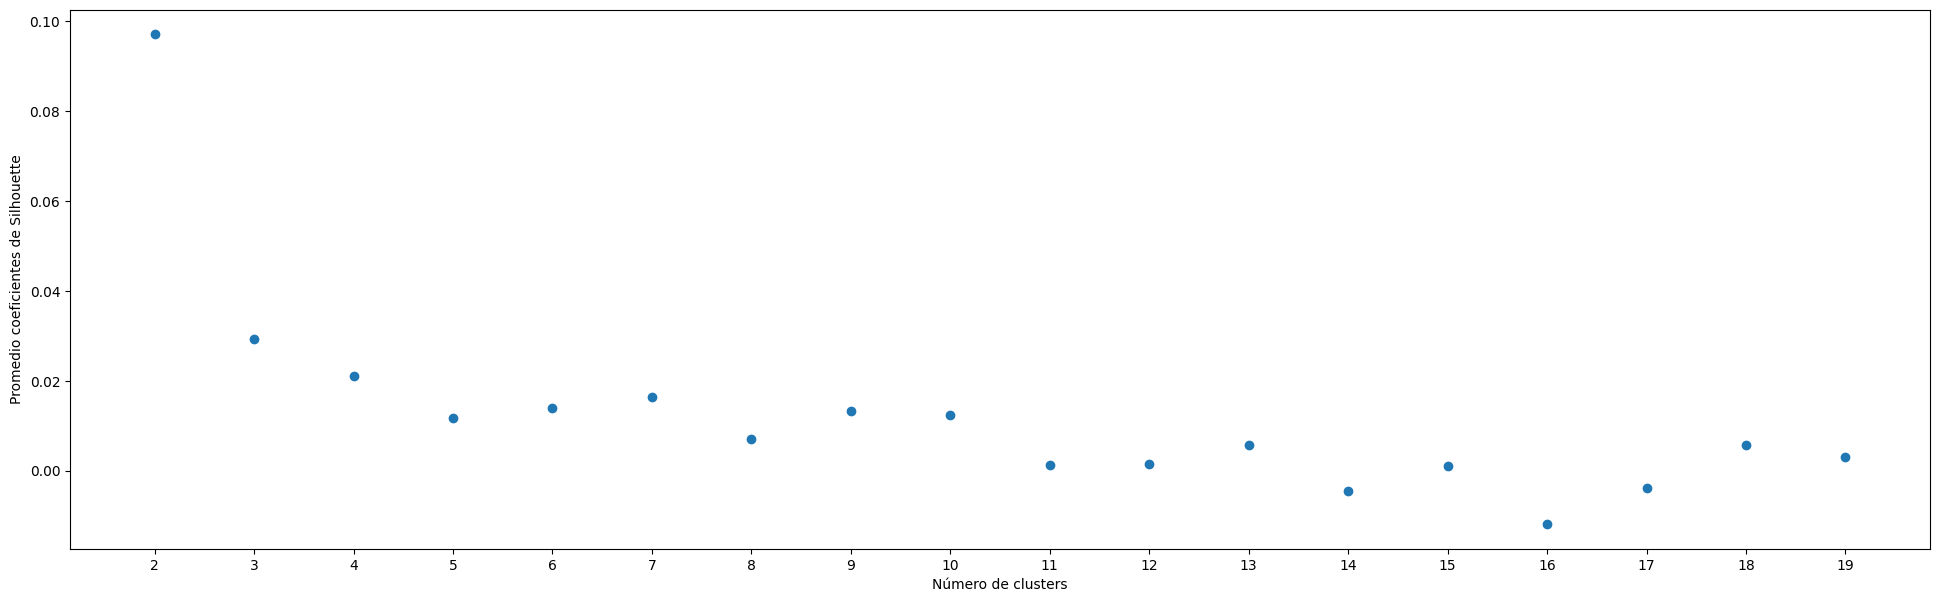

In [9]:

warnings.filterwarnings("ignore", category=FutureWarning)


# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []
# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(data)
     score = silhouette_score(data, kkkmeans.labels_)
     silhouette_coefficients.append(score)
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 20), silhouette_coefficients)
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

Si bien el resultado es una variable aleatoria el maximo local suele rondar en 7 clusters. De todos modos la consigna nos pide especificamente usar k = 8

# PCA

Ejercicio 2


Text(0.5, 0, 'Cantidad de componentes principales')

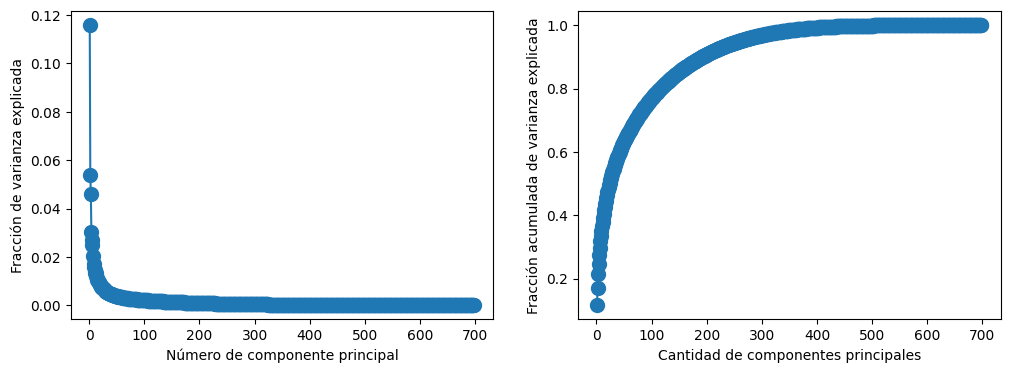

In [12]:
pca = PCA(n_components=None)
pca.fit(imagenes)
X_pca = pca.transform(imagenes)

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

# Podemos ver que con 400 componentes princiaples podemos explicar casi toda la varianza

In [13]:
# Creación del modelo de PCA con 400 componentes

pca = PCA(n_components = 400)
# Ajuste y transformación de los datos
pca.fit(imagenes)
X_pca = pca.transform(imagenes)
X_pca.shape

(698, 400)

Text(0, 0.5, 'Segunda componente principal')

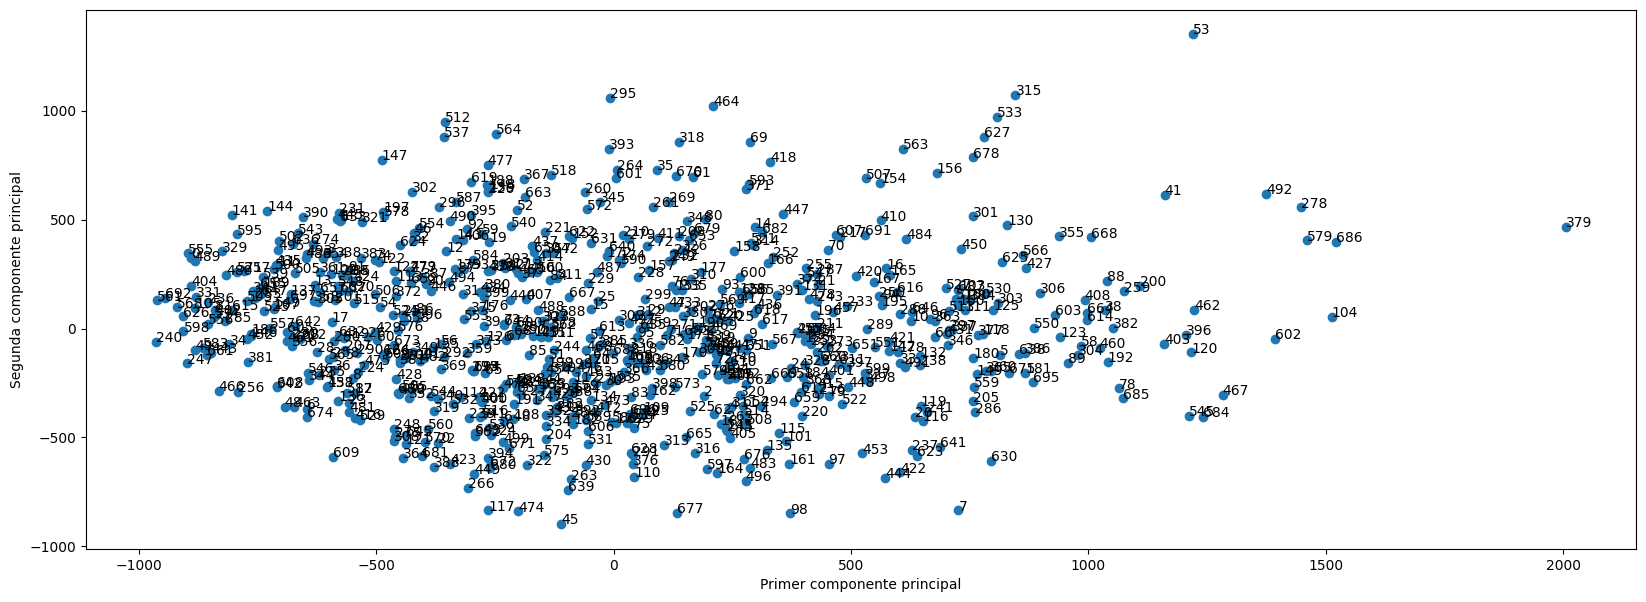

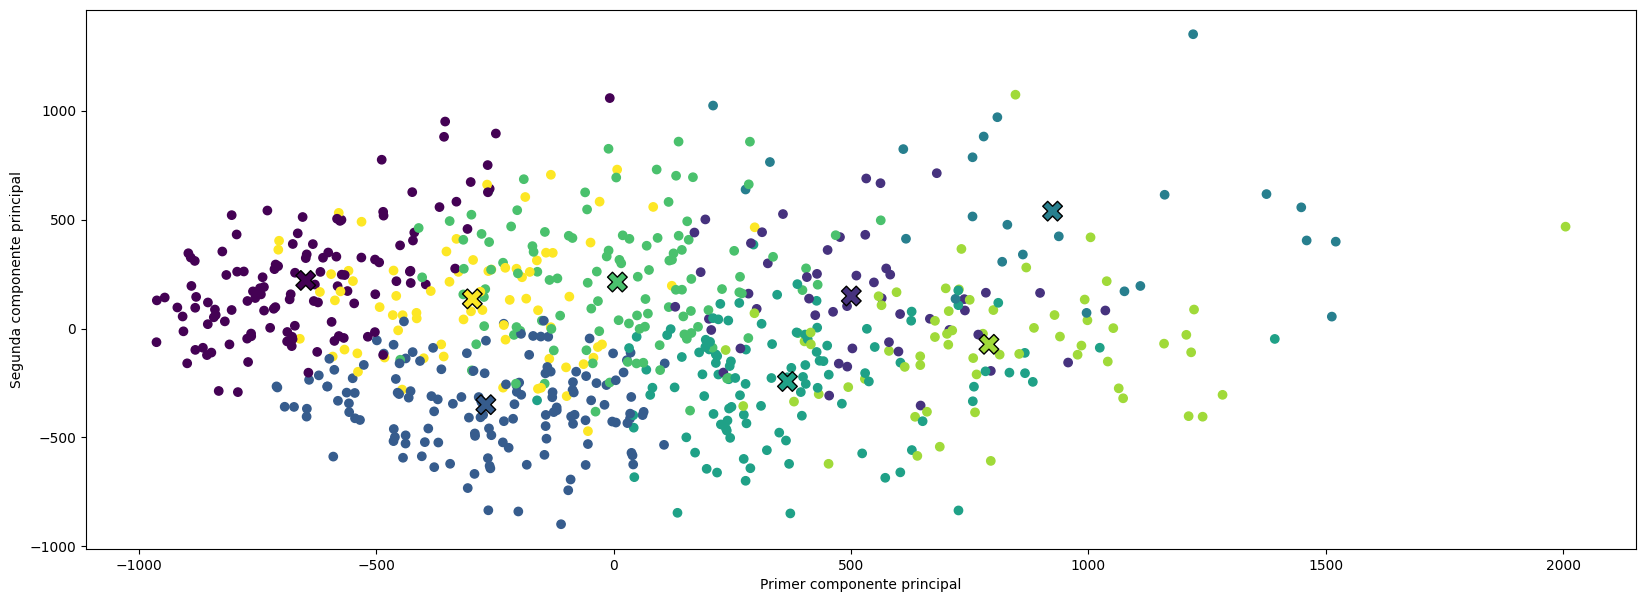

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning)


fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde
for i in range(data.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')
# Creación del modelo KMeans con k = 8
kmeans = KMeans(n_clusters=8)
# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(X_pca)
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(figsize = (20, 7))
# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

# Ejercicio 3.   Visualizar los primeros 10 elementos de cada cluster.


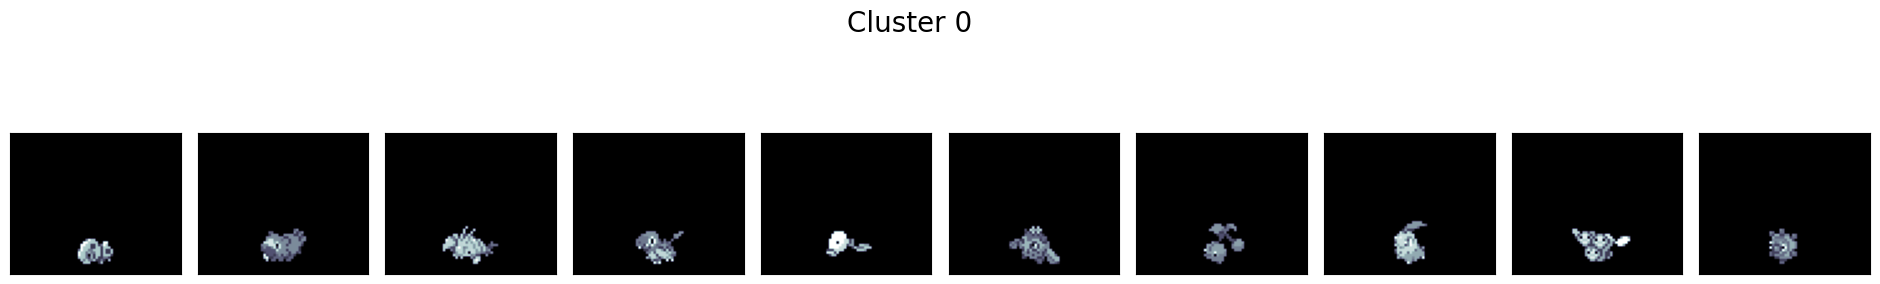

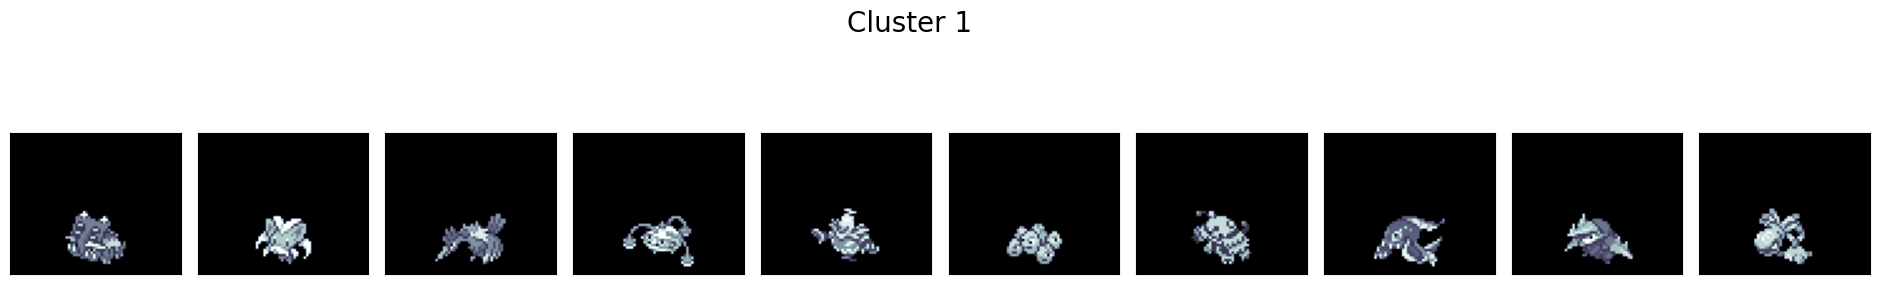

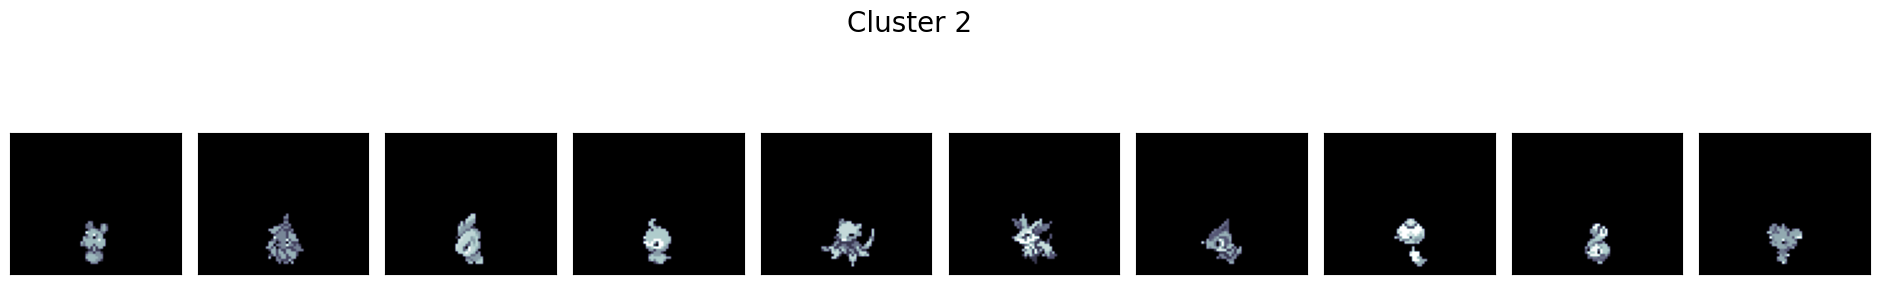

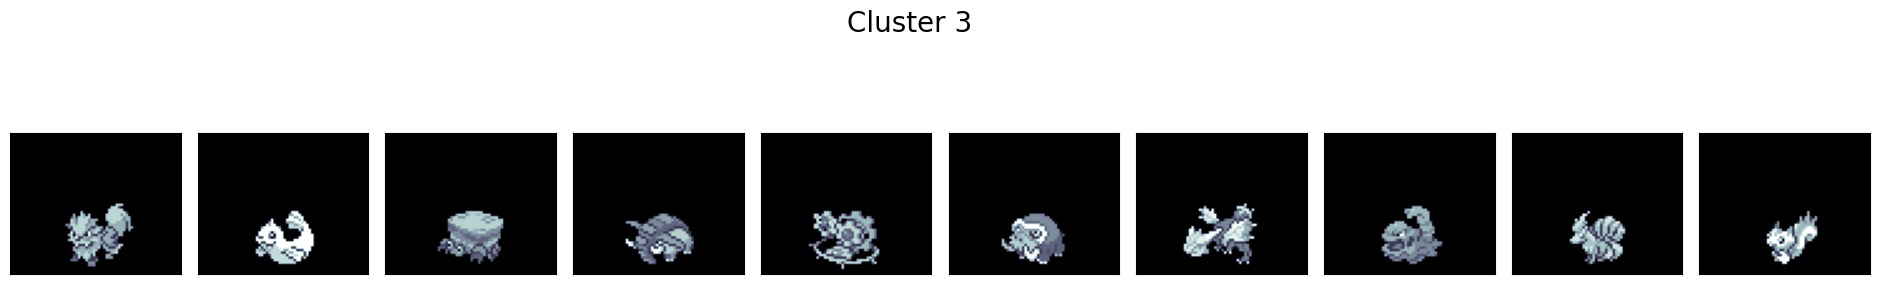

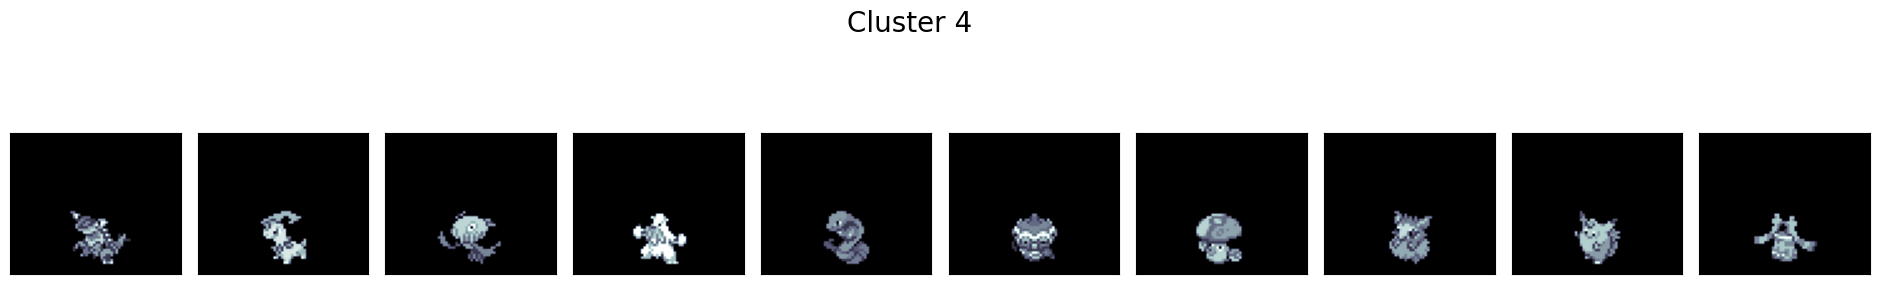

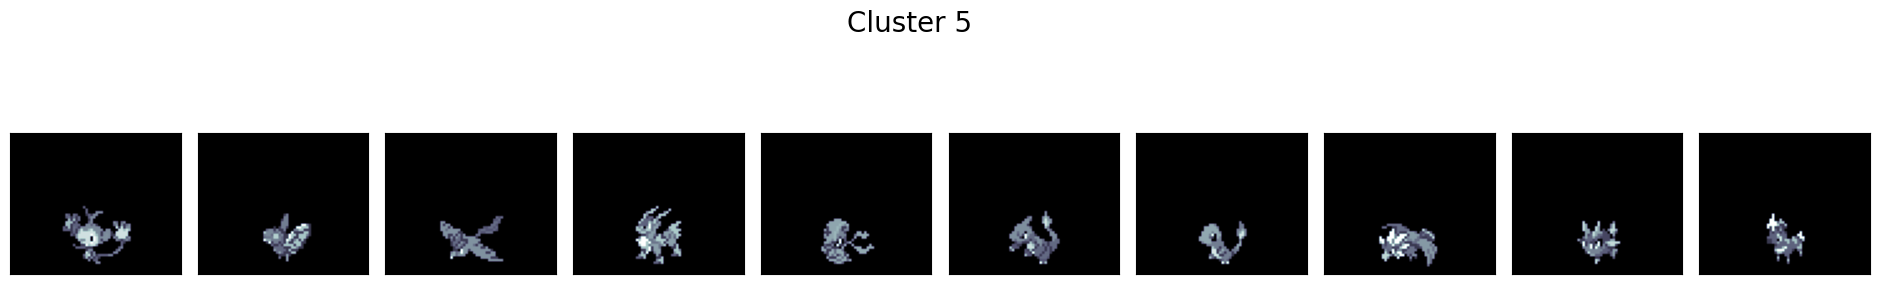

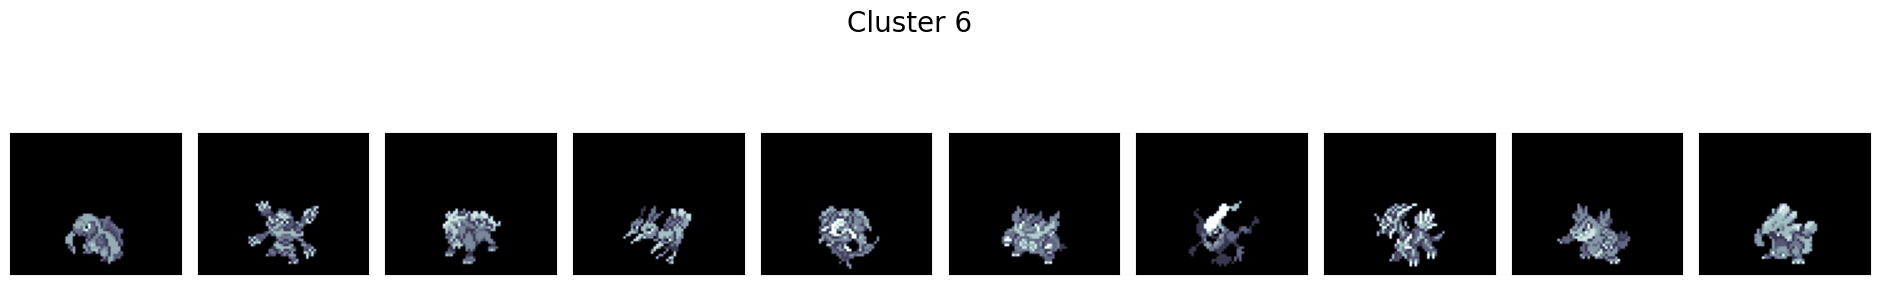

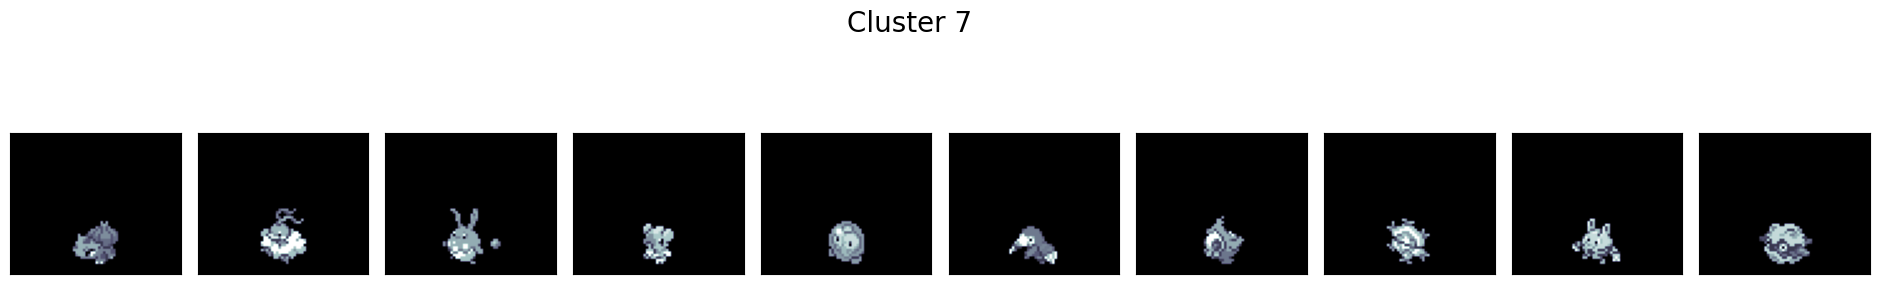

In [15]:
labels = kmeans.labels_

for i in range(8):
    index = np.nonzero(labels==i)[0]                           # los índices correspondientes a la i-ésima etiqueta
    num = 10                                                   # el número de samples en cada cluster
    this_faces = data[index].reshape(len(index),56,68)         # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (56,68)
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
      ax.imshow(this_faces[i], cmap='bone')




# Ejercicio 4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?

In [17]:
dff

In [21]:
dff = df.copy() # copiamos con .copy para no hacer lio
dff['cluster'] = pd.Series(labels, index=df.index) # agregamos los clusters calculados al DataFrame


In [55]:
# Calcular las estadísticas por cluster
cluster_stats = dff.groupby('cluster').agg({
    'HP': 'mean',
    'Attack': 'mean',
    'Defense': 'mean',
    'Sp. Atk': 'mean',
    'Sp. Def': 'mean',
    'Speed': 'mean',

}).reset_index()

# Renombrar las columnas para mayor claridad
cluster_stats.rename(columns={
    'HP': 'HP',
    'Attack': 'Attack',
    'Defense': 'Defense',
    'Sp. Atk': 'Sp. Atk',
    'Sp. Def': 'Sp. Def',
    'Speed': 'Speed',
}, inplace=True)



In [56]:
cluster_stats

,cluster,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,68.873950,77.974790,72.008403,64.613445,67.352941,68.436975
1,1,69.714286,72.346939,72.367347,66.693878,68.142857,68.612245
2,2,69.356643,74.258741,71.986014,72.440559,72.790210,69.944056
3,3,74.333333,76.500000,72.750000,74.000000,73.333333,60.875000
4,4,69.509091,77.054545,71.354545,68.709091,66.981818,64.290909
5,5,65.129310,74.172414,66.758621,65.568966,66.362069,60.500000
6,6,69.380952,72.000000,70.698413,70.380952,71.444444,63.253968
7,7,64.662162,71.905405,69.310811,66.000000,66.675676,60.094595


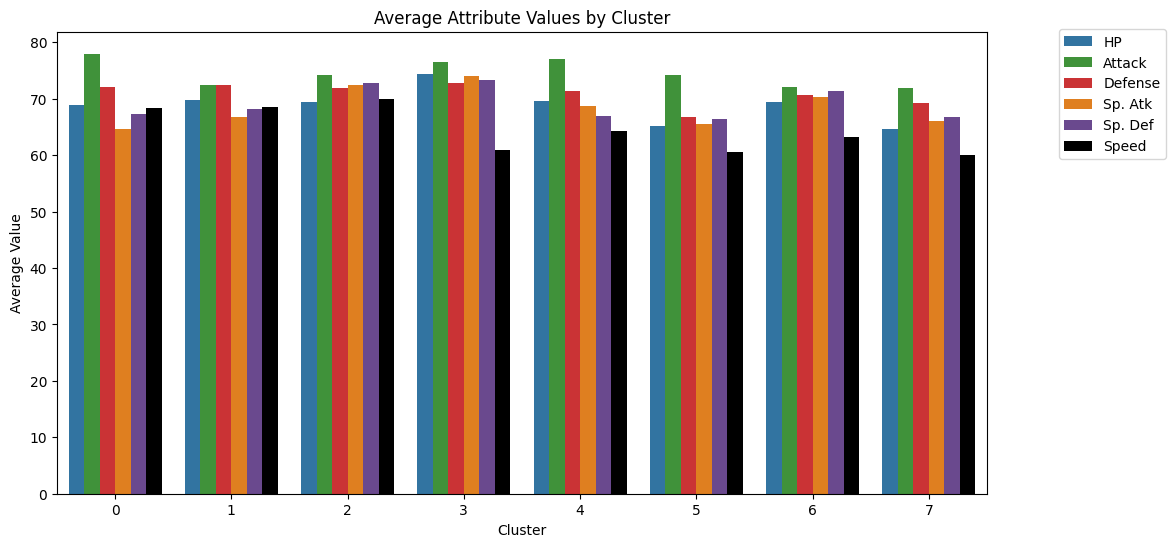

In [57]:

"""
id_vars='cluster': La columna 'cluster' se mantiene como identificador único para cada fila.
var_name='Attribute': Las columnas que se están "derritiendo" se colocan en una nueva columna llamada 'Attribute'.
value_name='Average Value': Los valores de esas columnas se colocan en una nueva columna llamada 'Average Value'.

"""


melted_stats = cluster_stats.melt(id_vars='cluster', var_name='Attribute', value_name='Average Value')
colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "black","pink"]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_stats, x='cluster', y='Average Value', hue='Attribute', palette=colors)

# Ajustar la posición del label
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.02))

plt.title('Average Attribute Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')

plt.show()


In [58]:
cluster_stats['Promedio Global'] = cluster_stats.iloc[:, 1:].mean(axis=1)


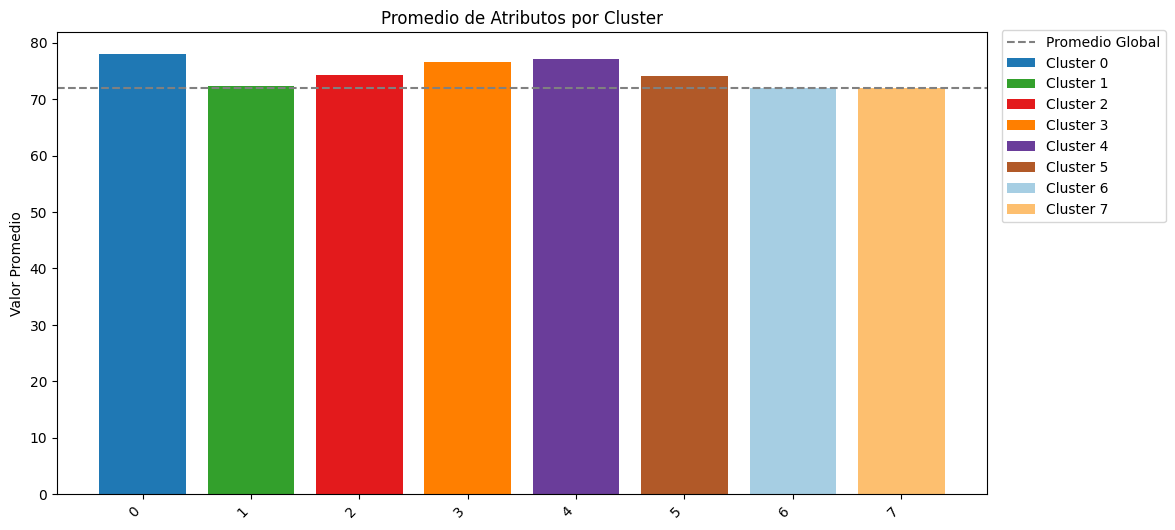

In [61]:
# Colores personalizados
colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928", "#a6cee3", "#fdbf6f"]

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Barra para cada atributo y cada cluster
for i, (cluster, color) in enumerate(zip(cluster_stats['cluster'], colors)):
    ax.bar(cluster, cluster_stats.iloc[i, 1:-1], label=f'Cluster {i}', color=color)

# Línea punteada para el promedio absoluto
ax.axhline(y=cluster_stats['Promedio Global'].max(), color='gray', linestyle='--', label='Promedio Global')

# Ajustes estéticos y leyenda
ax.set_ylabel('Valor Promedio')
ax.set_title('Promedio de Atributos por Cluster')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.02))

# Mostrar el gráfico
plt.show()

#Vemos que el cluster 0 resultó ser el mas fuerte

#Ejercicio 5.   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?


In [65]:
def tamañoPokemon(x):
  n = len(x)
  res = []
  #basicamente contamos la cantidad de pixeles negros
  # tamaño = total - pixelNegro
  for i in range(n):
   res.append(56*68 - np.unique(matImg[i], return_counts=True)[1][0])
  return res

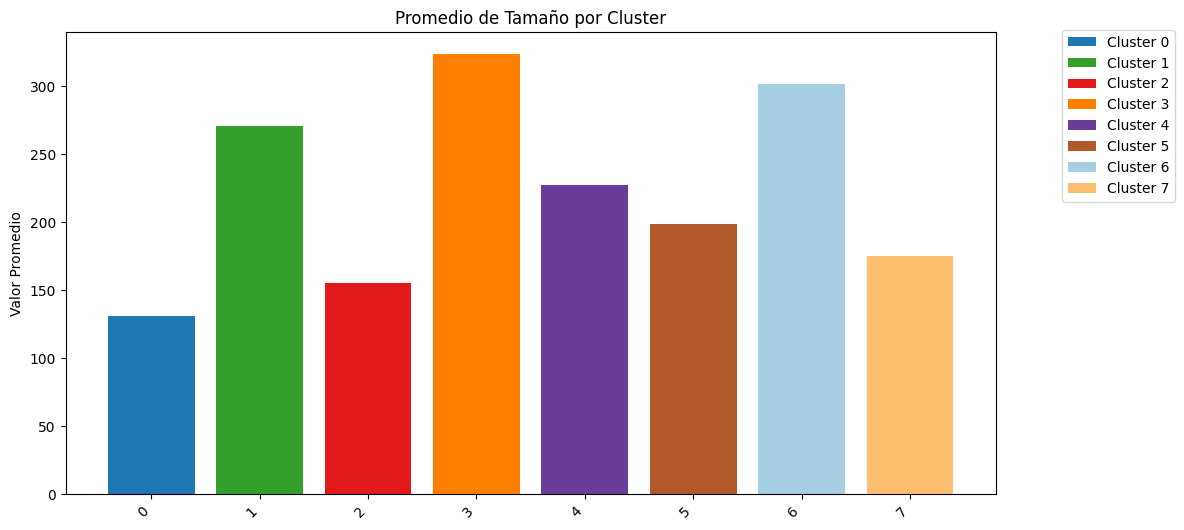

In [76]:
dff = df.copy() # copiamos con .copy para no hacer lio
dff['cluster'] = pd.Series(labels, index=df.index) # agregamos los clusters calculados al DataFrame
dff['tamaño'] = tamañoPokemon(np.array(imagenes))

size_prom = dff.groupby('cluster').agg({
    'tamaño': 'mean',
}).reset_index()

colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928", "#a6cee3", "#fdbf6f"]

fig, ax = plt.subplots(figsize=(12, 6))

for i, (cluster, color) in enumerate(zip(size_prom['cluster'], colors)):
    ax.bar(cluster, size_prom.loc[i, 'tamaño'], label=f'Cluster {i}', color=color)

ax.set_ylabel('Valor Promedio')
ax.set_title('Promedio de Tamaño por Cluster')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.02))

plt.show()


#ejercicio 6.   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros

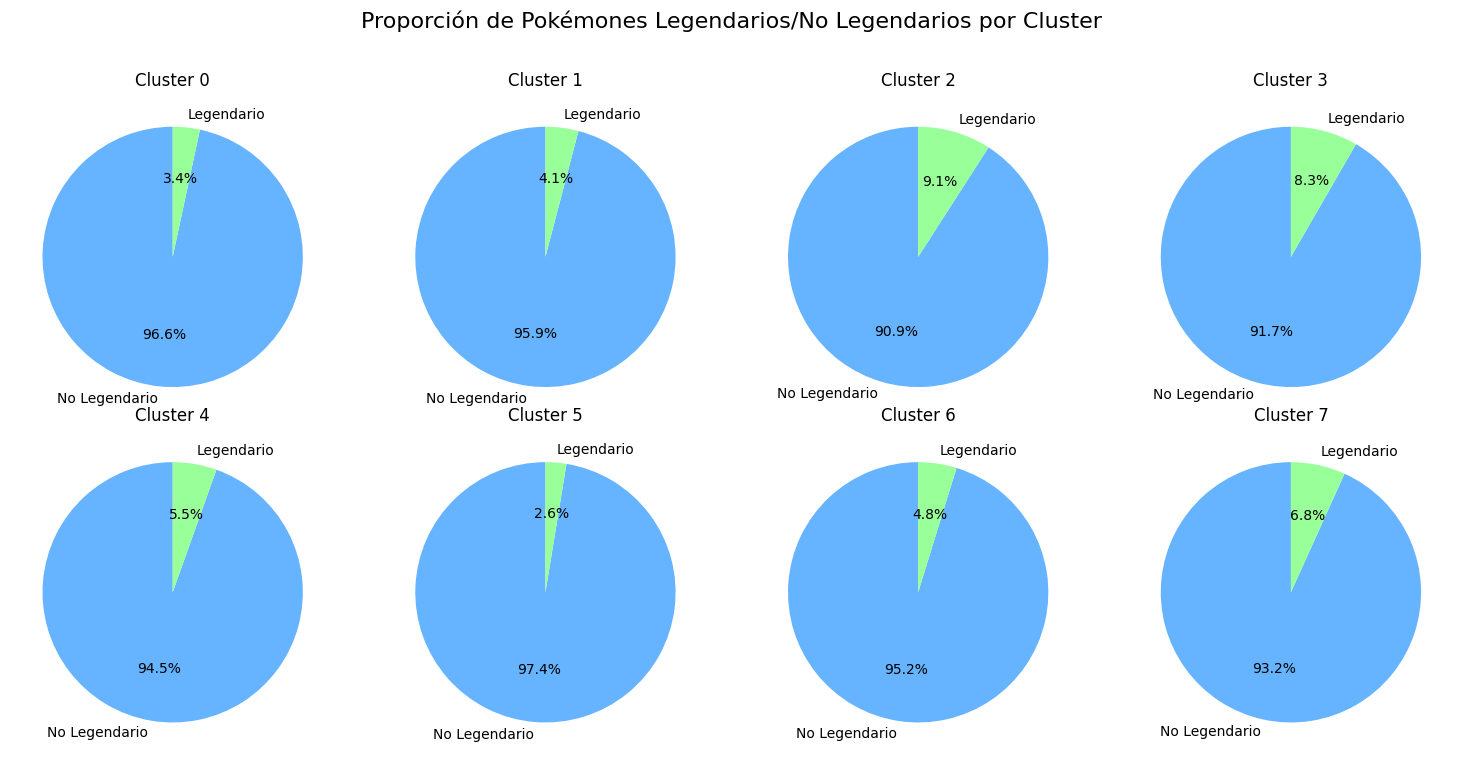

In [84]:
legendarios_por_cluster = dff.groupby(['cluster', 'Legendary']).size().unstack().fillna(0)
legendarios_por_cluster.columns = ['No Legendario', 'Legendario']


fig, axs = plt.subplots(2, 4, figsize=(15, 8))

for i in range(8):
    legendarios = legendarios_por_cluster.loc[i]
    axs[i // 4, i % 4].pie(legendarios, labels=legendarios.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
    axs[i // 4, i % 4].set_title(f'Cluster {i}')

fig.suptitle('Proporción de Pokémones Legendarios/No Legendarios por Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


El método `unstack` en pandas se utiliza para "desapilar" o "desencadenar" un nivel de índice en una Serie o DataFrame, moviendo los niveles de índice internos a columnas. En otras palabras, transforma un índice jerárquico en columnas.

Cuando se utiliza en el contexto de un DataFrame con un índice jerárquico (multi-índice), el método `unstack` convierte uno de los niveles del índice en columnas, proporcionando así una representación tabular diferente.

Por ejemplo, si tienes un DataFrame con un índice jerárquico en dos niveles:

```python
         Valor
Cluster  Legendary
0        False        105
         True          30
1        False        120
         True          25
```

Al aplicar `unstack()` al nivel 'Legendary', obtendrás:

```python
Legendary  False  True
Cluster              
0             105    30
1             120    25
```

En este nuevo DataFrame, 'Cluster' ahora es el índice, y las columnas son 'False' y 'True', representando la cantidad de Pokémones no legendarios y legendarios, respectivamente, en cada cluster. Esto facilita la creación de gráficos o análisis específicos.